In [19]:
import pandas as pd
import tensorflow as tf
from skimage import io 
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np

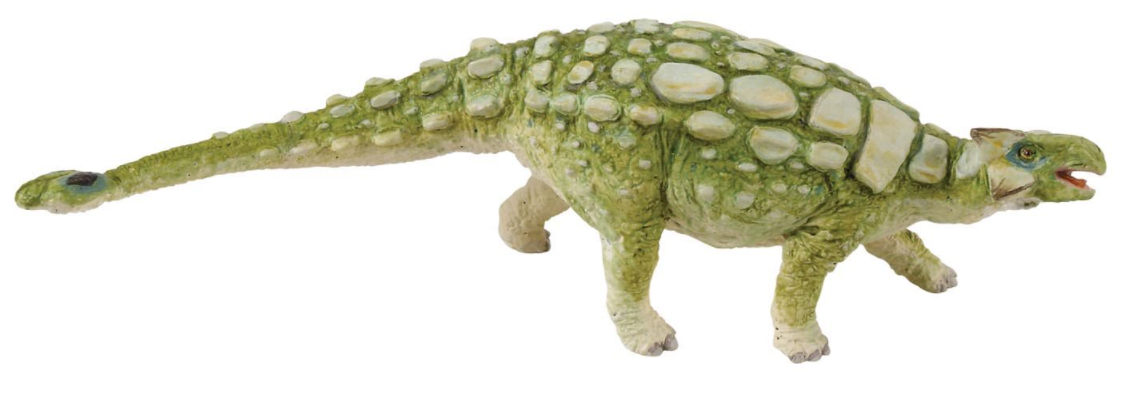

In [2]:
PIL.Image.open('data/ankylosaurus/1.png')

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 200 files belonging to 5 classes.
Using 160 files for training.
Found 200 files belonging to 5 classes.
Using 40 files for validation.


In [4]:
for element in train_ds:
  print(element)


(<tf.Tensor: shape=(32, 300, 500, 3), dtype=float32, numpy=
array([[[[253.       , 253.       , 252.       ],
         [253.       , 253.       , 252.829    ],
         [253.       , 253.       , 253.       ],
         ...,
         [253.       , 253.       , 251.715    ],
         [253.       , 253.       , 251.       ],
         [253.       , 253.       , 251.       ]],

        [[253.       , 253.71     , 250.58     ],
         [253.       , 253.12141  , 251.409    ],
         [253.       , 253.       , 252.08765  ],
         ...,
         [253.       , 253.       , 252.62735  ],
         [253.       , 253.       , 252.42     ],
         [253.       , 253.       , 252.42     ]],

        [[253.       , 254.       , 250.       ],
         [253.       , 253.59932  , 250.40068  ],
         [253.       , 253.14725  , 251.19833  ],
         ...,
         [253.       , 253.       , 253.       ],
         [253.       , 253.       , 253.       ],
         [253.       , 253.       , 253.    

2024-04-06 13:07:38.188667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
class_names = train_ds.class_names


2024-04-06 13:07:38.356204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


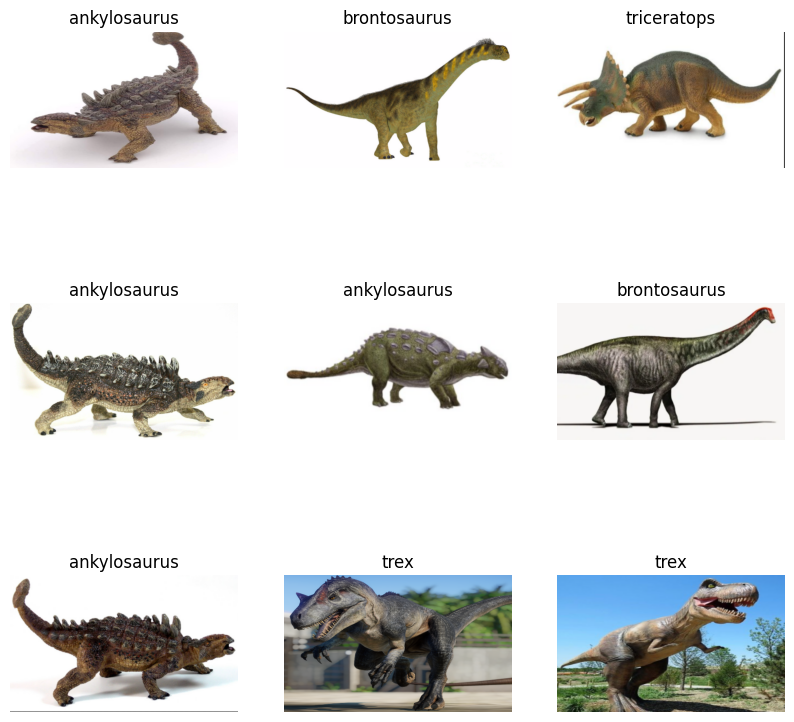

In [6]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  500,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(300, 500, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs = 4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 650ms/step - accuracy: 0.8804 - loss: 0.2926 - val_accuracy: 0.8500 - val_loss: 0.3355
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - accuracy: 0.8806 - loss: 0.2657 - val_accuracy: 0.8250 - val_loss: 0.3665
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - accuracy: 0.9177 - loss: 0.2295 - val_accuracy: 0.8500 - val_loss: 0.4363
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.9186 - loss: 0.2439 - val_accuracy: 0.9000 - val_loss: 0.2541
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.8916 - loss: 0.2757 - val_accuracy: 0.8000 - val_loss: 0.4945
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.9533 - loss: 0.1649 - val_accuracy: 0.8500 - val_loss: 0.2805
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 637ms/step - accuracy: 0.9367 - loss: 0.1837 - val_accuracy: 0.8000 - val_loss: 0.3782
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step - accuracy: 0.9286 - loss: 0.1998 - val_accuracy: 0.8000 - val_loss:

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [16]:
acc

[0.862500011920929,
 0.90625,
 0.925000011920929,
 0.925000011920929,
 0.8999999761581421,
 0.956250011920929,
 0.9312499761581421,
 0.918749988079071,
 0.918749988079071,
 0.9375,
 0.9125000238418579,
 0.9437500238418579,
 0.949999988079071,
 0.9750000238418579,
 0.956250011920929]

In [13]:
val_acc 

[0.10000000149011612,
 0.32499998807907104,
 0.375,
 0.7749999761581421,
 0.625,
 0.625,
 0.574999988079071,
 0.675000011920929,
 0.7250000238418579,
 0.574999988079071,
 0.800000011920929,
 0.800000011920929,
 0.875,
 0.8500000238418579,
 0.875]

In [21]:

img = tf.keras.utils.load_img(
    'anktest.jpeg', target_size=(300, 500)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This image most likely belongs to ankylosaurus with a 99.80 percent confidence.


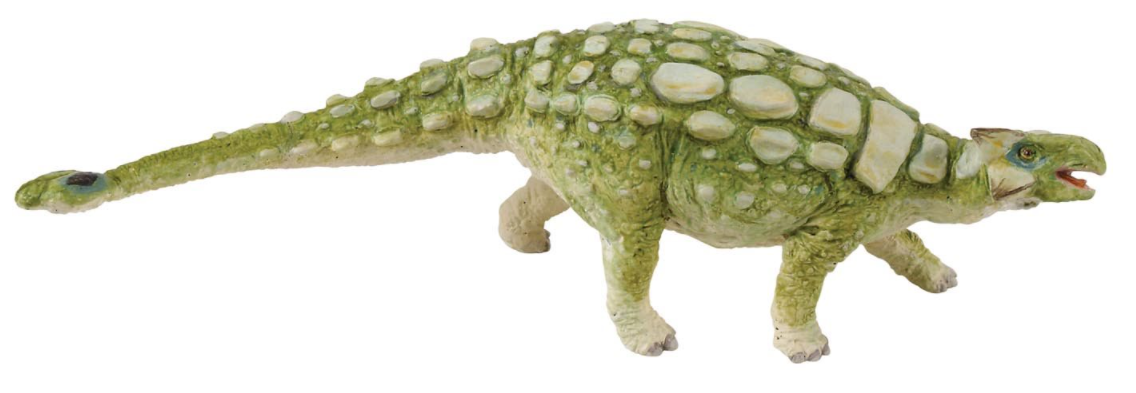

In [49]:
tf.keras.preprocessing.image.load_img('data/ankylosaurus/1.png')

In [8]:
tf?

In [7]:
df = pd.read_csv('data/dinosaur.csv')
df

,Name,Period,Diet,Country
0,Aardonyx,Jurassic,herbivore,South Africa
1,Abelisaurus,Cretaceous,carnivore,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa
3,Abrosaurus,Jurassic,herbivore,China
4,Abydosaurus,Cretaceous,herbivore,North America
...,...,...,...,...
1149,Zizhongosaurus,Jurassic,herbivore,China
1150,Zuniceratops,Cretaceous,herbivore,North America
1151,Zuolong,Jurassic,carnivore,China
1152,Zupaysaurus,Triassic,carnivore,South America
